To do list:
* [ ] Check results by imposing cut on DTF success
* [ ] Add data graphs (only 2016, possibly only part of it)
* [ ] Save plots
    * [ ] (In the future) Update slides
* [ ] Evaluate impact of cuts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import h5py
import time

# Monte Carlo data

In [2]:
inputMC = 'data/LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'
f = h5py.File(inputMC, 'r')
list(f.keys())

['LHCbMCTruth_Lb', 'LHCbMC_Lb']

In [3]:
tickMC = time.perf_counter()
df_reco = pd.read_hdf(inputMC, key='LHCbMC_Lb')
tockMC = time.perf_counter()
print(f"Monte Carlo imported in {tockMC - tickMC:0.4f} seconds.")
df_reco

Monte Carlo imported in 15.9194 seconds.


,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.952388,-0.165336,26.651770,402.777832,-229.470520,5536.814453,0.9524,-0.1653,26.652201,1910.136719,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.845292,-0.195122,3.622388,139.395874,322.585419,7428.522461,0.8453,-0.1950,3.620400,481.652618,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
2,-0.480003,-0.762014,18.670696,-819.340149,-626.124390,5389.564453,-0.4801,-0.7620,18.671101,-5395.257812,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
3,1.681797,-2.255294,-36.569271,113.645294,-329.222229,4678.392090,1.6818,-2.2553,-36.569199,7835.708984,...,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281,T,119
4,0.824895,-0.252737,74.871048,-100.702072,60.565861,6466.218750,0.8242,-0.2542,74.883598,-74.406654,...,135.662018,8106.856445,-3448.149902,-1045.294434,90591.554688,588.637329,239.301941,10912.332031,T,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366391,0.964920,0.161698,-12.157676,293.129822,39.016293,7097.797363,0.9649,0.1621,-12.151800,3175.616943,...,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062,T,8921673
366392,-0.498788,1.215896,21.856564,-176.847626,145.914993,8691.596680,-0.5001,1.2166,21.869101,-2664.720215,...,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125,T,8921702
366393,0.114458,-0.046962,25.276293,-29.465662,-15.364128,949.110657,0.1145,-0.0469,25.275400,-6107.898926,...,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312,T,8921772


In [4]:
list(df_reco)

['Lb_ENDVERTEX_X',
 'Lb_ENDVERTEX_Y',
 'Lb_ENDVERTEX_Z',
 'L_ENDVERTEX_X',
 'L_ENDVERTEX_Y',
 'L_ENDVERTEX_Z',
 'Jpsi_ENDVERTEX_X',
 'Jpsi_ENDVERTEX_Y',
 'Jpsi_ENDVERTEX_Z',
 'L_PX',
 'L_PY',
 'L_PZ',
 'Lb_PX',
 'Lb_PY',
 'Lb_PZ',
 'Jpsi_PX',
 'Jpsi_PY',
 'Jpsi_PZ',
 'p_PX',
 'p_PY',
 'p_PZ',
 'pim_PX',
 'pim_PY',
 'pim_PZ',
 'mum_PX',
 'mum_PY',
 'mum_PZ',
 'mup_PX',
 'mup_PY',
 'mup_PZ',
 'L_M',
 'L_MM',
 'Lb_M',
 'Lb_MM',
 'Jpsi_M',
 'Jpsi_MM',
 'Lb_BPVDIRA',
 'Lb_BPVIPCHI2',
 'Lb_BPVVDCHI2',
 'Lb_VFASPF_CHI2_VDOF',
 'L_BPVDIRA',
 'L_BPVIPCHI2',
 'L_BPVVDCHI2',
 'L_VFASPF_CHI2_VDOF',
 'Lb_OWNPV_X',
 'Lb_OWNPV_Y',
 'Lb_OWNPV_Z',
 'Lb_OWNPV_CHI2',
 'Lb_OWNPV_NDOF',
 'L_ID',
 'Lb_ID',
 'Jpsi_ID',
 'p_ID',
 'pim_ID',
 'mum_ID',
 'mup_ID',
 'DTF_FixJPsi_status',
 'DTF_FixJPsi_Lb_M',
 'DTF_FixJPsi_Lb_P',
 'DTF_FixJPsi_chi2',
 'DTF_FixJPsi_nDOF',
 'DTF_FixJPsi_PV_key',
 'DTF_FixJPsi_PV_X',
 'DTF_FixJPsi_PV_Y',
 'DTF_FixJPsi_PV_Z',
 'DTF_FixJPsi_L_M',
 'DTF_FixJPsi_L_P',
 'DTF_FixJPsi_L_dec

In [5]:
tickMCTruth = time.perf_counter()
df_truth = pd.read_hdf(inputMC, key='LHCbMCTruth_Lb')
tockMCTruth = time.perf_counter()
print(f"Monte Carlo Truth imported in {tockMCTruth - tickMCTruth:0.4f} seconds.")
df_truth

Monte Carlo Truth imported in 203.0449 seconds.


,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,mup_PP_X,mup_PP_Y,mup_PP_Z,mup_PP_PX,mup_PP_PY,mup_PP_PZ,mup_PP_Weight,Rec_key,N_rec_matches,TrackType
MC_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,0.6208,-0.5355,21.231701,1448.819824,1628.266357,23763.910156,0.975000,0,1,T
1,0.4619,-0.3471,-52.081200,-19.765400,-33.384300,45.136002,-1190.050049,-1817.560059,5618.410156,-125.169998,...,0.2795,-0.4641,-50.938000,-3430.944092,-2054.681885,20444.863281,1.000000,-1,0,NA
2,0.8623,-0.0693,39.078201,145.114395,-70.015701,2563.685059,1349.000000,-574.190002,22276.189453,239.940002,...,0.1603,-0.3852,34.265598,1869.628418,869.200012,13080.188477,1.000000,-1,0,NA
3,0.8441,-0.1694,17.714300,-9.207400,27.546700,3520.887207,-295.320007,790.229980,93841.296875,3.170000,...,0.4994,-0.5171,14.525300,491.177612,513.784912,5034.924805,1.000000,-1,0,NA
4,0.6610,-0.4327,7.083600,-23.592199,-54.290798,201.384293,-1843.489990,-4303.959961,15525.910156,-361.470001,...,-0.0085,-0.3661,9.187500,-2067.989014,93.588974,6374.103027,1.000000,-1,0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921810,0.7382,-0.1062,0.347100,-2.454600,0.459400,68.980499,-1052.079956,169.649994,21721.480469,-270.470001,...,0.5466,-0.3809,3.584800,-1646.731689,-2497.763672,30773.214844,0.942857,-1,0,NA
8921811,0.6401,-0.0814,27.420200,4.920900,-10.475100,58.229698,680.200012,-1542.880005,4852.310059,153.279999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,NA
8921812,2.0908,-1.0901,46.602200,36.268501,-29.632999,1175.768677,4569.680176,-3904.929932,153438.671875,582.070007,...,0.3603,0.4048,30.488100,1073.656860,-936.144836,10031.811523,0.975000,-1,0,NA


In [6]:
list(df_truth)

['MCTRUTH_Lb_ENDVERTEX_X',
 'MCTRUTH_Lb_ENDVERTEX_Y',
 'MCTRUTH_Lb_ENDVERTEX_Z',
 'MCTRUTH_L_ENDVERTEX_X',
 'MCTRUTH_L_ENDVERTEX_Y',
 'MCTRUTH_L_ENDVERTEX_Z',
 'MCTRUTH_p_PX',
 'MCTRUTH_p_PY',
 'MCTRUTH_p_PZ',
 'MCTRUTH_pim_PX',
 'MCTRUTH_pim_PY',
 'MCTRUTH_pim_PZ',
 'MCTRUTH_mum_PX',
 'MCTRUTH_mum_PY',
 'MCTRUTH_mum_PZ',
 'MCTRUTH_mup_PX',
 'MCTRUTH_mup_PY',
 'MCTRUTH_mup_PZ',
 'MCTRUTH_Lb_ID',
 'MCTRUTH_L_ID',
 'Lb_Reconstructible',
 'Lb_Reconstructed',
 'L_Reconstructible',
 'L_Reconstructed',
 'Jpsi_Reconstructible',
 'Jpsi_Reconstructed',
 'p_Reconstructible',
 'p_Reconstructed',
 'pim_Reconstructible',
 'pim_Reconstructed',
 'mum_Reconstructible',
 'mum_Reconstructed',
 'mup_Reconstructible',
 'mup_Reconstructed',
 'p_PP_X',
 'p_PP_Y',
 'p_PP_Z',
 'p_PP_PX',
 'p_PP_PY',
 'p_PP_PZ',
 'p_PP_Weight',
 'pim_PP_X',
 'pim_PP_Y',
 'pim_PP_Z',
 'pim_PP_PX',
 'pim_PP_PY',
 'pim_PP_PZ',
 'pim_PP_Weight',
 'mum_PP_X',
 'mum_PP_Y',
 'mum_PP_Z',
 'mum_PP_PX',
 'mum_PP_PY',
 'mum_PP_PZ',
 'mum

In [7]:
tickMerge = time.perf_counter()
df_MC = pd.merge(df_truth.loc[df_truth['Rec_key'] >= 0], df_reco, left_index=True, right_on='MC_key')
tockMerge = time.perf_counter()
print(f"Monte Carlo merged in {tockMerge - tickMerge:0.4f} seconds.")

Monte Carlo merged in 3.5689 seconds.


In [8]:
df_MC = df_MC.loc[(df_MC['MC_key'] >= 0) & (df_MC['Rec_key'] >= 0)]

In [85]:
#df_MC_Filtered = df_MC.loc[(df_MC['L_ENDVERTEX_Z'] >= 5500) & (df_MC['L_ENDVERTEX_Z'] <= 8500)]

LambdaZCuts = (df_MC['L_ENDVERTEX_Z'] > 5500) & (df_MC['L_ENDVERTEX_Z'] < 8500)
LambdaMCuts = (df_MC['L_M'] > 600) & (df_MC['L_M'] < 1500)
LambdaDiraCuts = (df_MC['L_BPVDIRA'] > 0.9999)
LambdaChi2Cuts = (df_MC['L_BPVIPCHI2'] < 200) & (df_MC['L_BPVVDCHI2'] < 2e7) & (df_MC['L_VFASPF_CHI2_VDOF'] < 750)

LambdabMCuts = (df_MC['Lb_M'] < 8500)
LambdabDiraCuts = (df_MC['L_BPVDIRA'] > 0.99) | (df_MC['L_BPVDIRA'] < -0.99)
LambdabChi2Cuts = (df_MC['L_BPVIPCHI2'] < 1750) & (df_MC['L_VFASPF_CHI2_VDOF'] < 150)

#DTFCuts = (df_MC['DTF_FixJPsiLambda_status'] == 'Success')

df_MC_Filtered = df_MC.loc[(LambdaZCuts) & (LambdaMCuts) & (LambdaDiraCuts) 
                           & (LambdaChi2Cuts) & (LambdabMCuts) & (LambdabDiraCuts) & (LambdabChi2Cuts)]
df_MC_Filtered

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
8,0.5442,-0.4049,-30.064199,-237.463104,-161.438004,5029.397461,-1999.180054,-1447.800049,43812.398438,-599.280029,...,-151.918823,7139.517578,100.262436,999.515259,50033.699219,-120.737198,-995.344788,6822.337402,T,277
14,0.9904,-0.2075,-9.769600,224.561996,56.081600,5921.048828,2894.560059,699.140015,74302.851562,293.929993,...,104.645416,10220.954102,-884.967468,195.843964,34903.839844,1645.699585,-1113.117432,24484.212891,T,367
17,0.8236,-0.2738,28.986401,-296.374695,-100.123802,5963.561523,-1268.760010,-522.340027,25478.310547,-184.460007,...,20.153040,3543.737305,-829.315674,-926.117676,37815.328125,2614.833252,-1553.520630,63936.839844,T,493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366374,1.9930,-0.9682,33.883499,454.162109,-444.944794,6047.499512,7053.950195,-6800.229980,92633.132812,949.369995,...,-1059.302368,13806.107422,2310.392578,-2437.838867,42988.765625,2057.492432,-877.707703,10357.686523,T,8921400
366378,1.2187,-0.0757,-10.080700,120.471603,-69.038300,7221.361328,1256.689941,-628.059998,71476.546875,189.229996,...,-259.237457,19192.976562,1663.037476,477.534760,14450.500000,-812.013245,-604.744568,27734.162109,T,8921503
366382,1.1575,-0.3940,43.910599,4.075100,-146.877396,7409.937500,133.949997,-2934.969971,147684.812500,-69.339996,...,-295.752747,15403.834961,196.509079,-679.625732,6668.261719,3547.472900,-3286.872803,190998.375000,T,8921603


# Real data
Will implement when I find 40.5GiB under a tree

In [9]:
inputData = 'data/LHCbData_2016_MagUpDown_Dimuon_Ttracks.h5'
f = h5py.File(inputData, 'r')
list(f.keys())

['LHCbData']

In [10]:
tickData = time.perf_counter()
df_Data = pd.read_hdf(inputData, key='LHCbData')
tockData = time.perf_counter()
print(f"Data imported found in {tockData - tickData:0.4f} seconds.")
df_Data

Data imported found in 2.3538 seconds.


,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_PV_key,DTF_FixJPsiLambda_PIDSubs_PV_X,DTF_FixJPsiLambda_PIDSubs_PV_Y,DTF_FixJPsiLambda_PIDSubs_PV_Z,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ
0,0.632911,0.178342,5.049691,-255.844350,-56.212455,5932.709218,0.6329,0.1792,5.0475,-2260.323965,...,0.0,0.8267,-0.1550,19.988899,-793.328735,54.095398,4428.873047,552.359741,-1187.884155,58499.570312
1,0.819310,-0.207494,-12.258046,-82.289033,-16.596403,6057.988532,0.8168,-0.2077,-12.2864,-1174.547999,...,1.0,0.8492,-0.2103,-10.463600,-676.136108,-172.411438,10995.480469,3460.861572,-314.394806,44735.148438
2,0.839784,-0.138968,5.569199,110.246146,-332.334733,7637.261873,0.8398,-0.1389,5.5690,238.606931,...,0.0,0.8169,-0.1704,5.833900,-335.475464,856.159424,4723.041016,-2293.340088,-2661.276123,15929.165039
3,0.974854,-0.085595,20.542496,-32.013989,97.482524,6381.826624,0.9740,-0.0862,20.5376,-520.050217,...,0.0,0.8305,-0.1786,19.118700,1989.267334,506.550293,31564.787109,3074.307373,855.257324,15494.530273
4,0.915558,-0.309900,-33.831447,-129.211182,-8.126649,7658.323406,0.9167,-0.3099,-33.8246,-1304.095805,...,0.0,0.8895,-0.2111,-36.981800,-1010.378479,-945.691162,13932.727539,2256.578613,-1760.062866,39286.671875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30762,1.415804,0.635232,48.199766,-103.691518,69.554208,5530.043290,1.4162,0.6356,48.2025,-667.048455,...,3.0,0.8283,-0.1404,33.578499,1583.915771,-837.966736,14534.392578,1065.122070,2290.103760,18883.162109
30763,1.578682,-0.500844,38.590029,599.619478,-1.888674,6612.751560,1.5778,-0.5013,38.6110,1201.759190,...,0.0,0.8217,-0.1758,12.227500,2079.289062,-610.190979,68426.148438,-852.791992,-11.769394,9356.021484
30764,0.882202,-0.072489,-78.340078,-603.335948,-7.086196,6769.918332,0.8821,-0.0727,-78.3415,-2868.783700,...,0.0,0.8703,-0.1532,-79.063103,792.773254,1792.366943,14657.937500,808.886841,-1221.692871,17950.427734
30765,0.701203,-0.079482,60.243262,281.688808,55.745308,6889.691807,0.7010,-0.0794,60.2413,1964.561682,...,0.0,0.8189,-0.1289,61.593800,266.383972,932.468079,17321.734375,3549.115723,-1390.437866,36728.511719


# Data analysis
## $\Lambda$ decay vertex: $x$ component

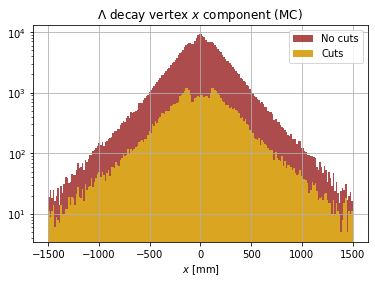

In [78]:
plt.hist(df_MC['L_ENDVERTEX_X'], bins=200, range=(-1500,1500),
         color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(df_MC_Filtered['L_ENDVERTEX_X'], bins=200, range=(-1500,1500),
         color='goldenrod', alpha=1, label="Cuts", density=False)
plt.grid()
plt.yscale('log')
plt.title("$\Lambda$ decay vertex $x$ component (MC)")
plt.legend()
plt.xlabel("$x$ [mm]")
#plt.savefig("mcvd/lambda_endvertex/LEVx_MC.pdf")
plt.show()

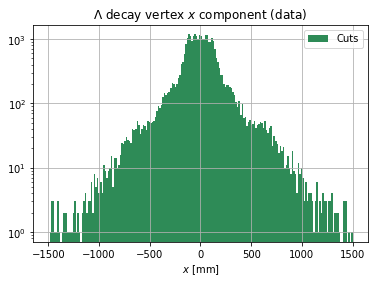

In [14]:
plt.hist(df_Data['L_ENDVERTEX_X'], bins=200, range=(-1500,1500),
         color='seagreen', alpha=1, label="Cuts", density=False)
plt.grid()
plt.yscale('log')
plt.title("$\Lambda$ decay vertex $x$ component (data)")
plt.legend()
plt.xlabel("$x$ [mm]")
#plt.savefig("mcvd/lambda_endvertex/LEVx_MC.pdf")
plt.show()

### $x-x_\text{true}$

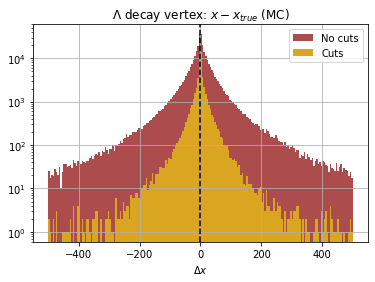

In [79]:
plt.hist(df_MC['L_ENDVERTEX_X'] - df_MC['MCTRUTH_L_ENDVERTEX_X'], 
         range=(-500,500), bins=200, color='darkred',alpha=0.7, label='No cuts')
plt.hist(df_MC_Filtered['L_ENDVERTEX_X'] - df_MC_Filtered['MCTRUTH_L_ENDVERTEX_X'],
         range=(-500,500), bins=200, color='goldenrod', label='Cuts')
plt.axvline(0,0,100,color='k',linestyle='--')
plt.grid()
plt.yscale('log')
plt.title('$\Lambda$ decay vertex: $x-x_{true}$ (MC)')
plt.xlabel('$\Delta x$')
plt.legend()
#plt.savefig("mcvd/lambda_endvertex/LEVx_MC_true-residuals.pdf")
plt.show()

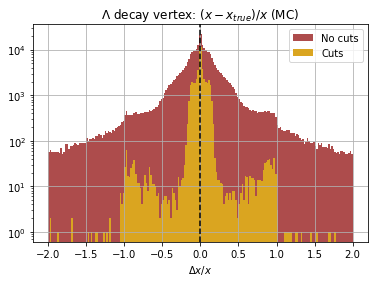

In [80]:
plt.hist((df_MC['L_ENDVERTEX_X'] - df_MC['MCTRUTH_L_ENDVERTEX_X'])/abs(df_MC['L_ENDVERTEX_X']),
         range=(-2,2), bins=200, color='darkred',alpha=0.7, label='No cuts')
plt.hist((df_MC_Filtered['L_ENDVERTEX_X'] - df_MC_Filtered['MCTRUTH_L_ENDVERTEX_X'])/abs(df_MC_Filtered['L_ENDVERTEX_X']),
         range=(-2,2), bins=200, color='goldenrod', label='Cuts')
plt.axvline(0,0,100,color='k',linestyle='--')
plt.grid()
plt.yscale('log')
plt.title('$\Lambda$ decay vertex: $(x-x_{true})/x$ (MC)')
plt.xlabel('$\Delta x / x$')
plt.legend()
#plt.savefig("mcvd/lambda_endvertex/LEVx_MC_true-residuals.pdf")
plt.show()

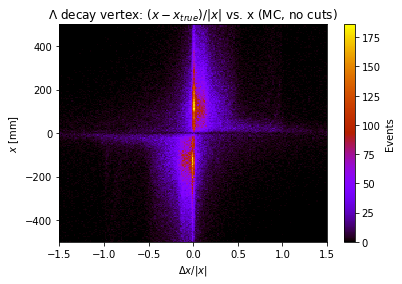

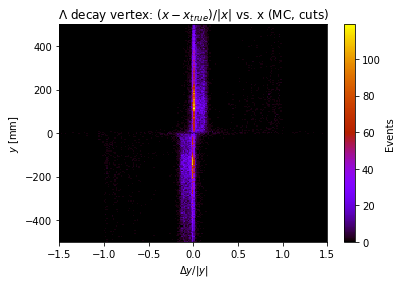

In [81]:
plt.hist2d((df_MC['L_ENDVERTEX_X'] - df_MC['MCTRUTH_L_ENDVERTEX_X'])/abs(df_MC['L_ENDVERTEX_X']),
           df_MC['L_ENDVERTEX_X'], bins=200, cmap='gnuplot',
          range=[[-1.5,1.5],[-500,500]])
plt.xlabel('$\Delta x / |x|$')
plt.ylabel("$x$ [mm]")
plt.title('$\Lambda$ decay vertex: $(x-x_{true})/|x|$ vs. x (MC, no cuts)')
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC_Filtered['L_ENDVERTEX_X'] - df_MC_Filtered['MCTRUTH_L_ENDVERTEX_X'])/abs(df_MC_Filtered['L_ENDVERTEX_X']),
           df_MC_Filtered['L_ENDVERTEX_X'], bins=200, cmap='gnuplot',
          range=[[-1.5,1.5],[-500,500]])
plt.xlabel('$\Delta y / |y|$')
plt.ylabel("$y$ [mm]")
plt.title('$\Lambda$ decay vertex: $(x-x_{true})/|x|$ vs. x (MC, cuts)')
plt.colorbar(label='Events')
plt.show()

## $\Lambda$ decay vertex: $y$ component

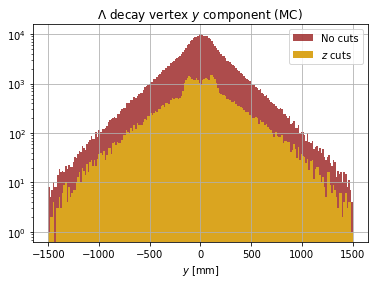

In [82]:
plt.hist(df_MC['L_ENDVERTEX_Y'], bins=200, range=(-1500,1500),
         color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(df_MC_Filtered['L_ENDVERTEX_Y'], bins=200, range=(-1500,1500),
         color='goldenrod', alpha=1, label="$z$ cuts", density=False)
plt.grid()
plt.yscale('log')
plt.title("$\Lambda$ decay vertex $y$ component (MC)")
plt.legend()
plt.xlabel("$y$ [mm]")
#plt.savefig("mcvd/lambda_endvertex/LEVy_MC.pdf")
plt.show()

### $y-y_\text{true}$

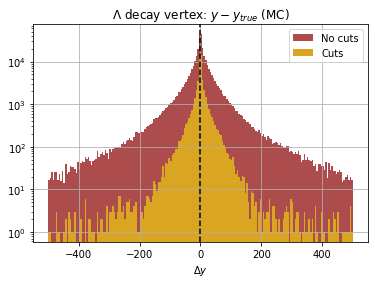

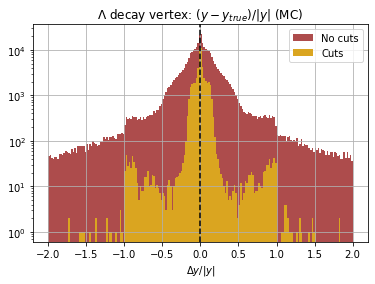

In [83]:
plt.hist(df_MC['L_ENDVERTEX_Y'] - df_MC['MCTRUTH_L_ENDVERTEX_Y'], 
         range=(-500,500), bins=200, color='darkred',alpha=0.7, label='No cuts')
plt.hist(df_MC_Filtered['L_ENDVERTEX_Y'] - df_MC_Filtered['MCTRUTH_L_ENDVERTEX_Y'],
         range=(-500,500), bins=200, color='goldenrod', label='Cuts')
plt.axvline(0,0,100,color='k',linestyle='--')
plt.grid()
plt.yscale('log')
plt.title('$\Lambda$ decay vertex: $y-y_{true}$ (MC)')
plt.xlabel('$\Delta y$')
plt.legend()
#plt.savefig("mcvd/lambda_endvertex/LEVx_MC_true-residuals.pdf")
plt.show()

plt.hist((df_MC['L_ENDVERTEX_Y'] - df_MC['MCTRUTH_L_ENDVERTEX_Y'])/abs(df_MC['L_ENDVERTEX_Y']),
         range=(-2,2), bins=200, color='darkred',alpha=0.7, label='No cuts')
plt.hist((df_MC_Filtered['L_ENDVERTEX_Y'] - df_MC_Filtered['MCTRUTH_L_ENDVERTEX_Y'])/abs(df_MC_Filtered['L_ENDVERTEX_Y']),
         range=(-2,2), bins=200, color='goldenrod', label='Cuts')
plt.axvline(0,0,100,color='k',linestyle='--')
plt.grid()
plt.yscale('log')
plt.title('$\Lambda$ decay vertex: $(y-y_{true})/|y|$ (MC)')
plt.xlabel('$\Delta y / |y|$')
plt.legend()
#plt.savefig("mcvd/lambda_endvertex/LEVx_MC_true-residuals.pdf")
plt.show()

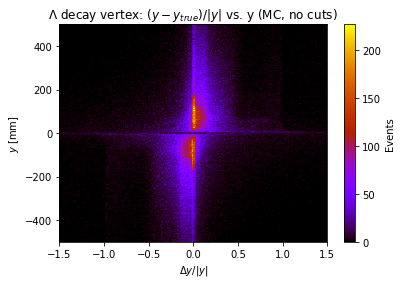

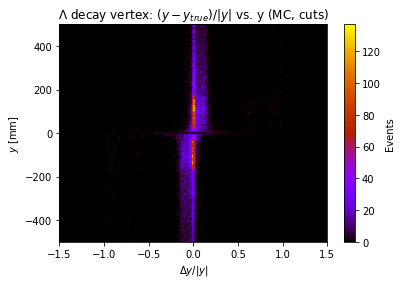

In [84]:
plt.hist2d((df_MC['L_ENDVERTEX_Y'] - df_MC['MCTRUTH_L_ENDVERTEX_Y'])/abs(df_MC['L_ENDVERTEX_Y']),
           df_MC['L_ENDVERTEX_Y'], bins=200, cmap='gnuplot',
          range=[[-1.5,1.5],[-500,500]])
plt.xlabel('$\Delta y / |y|$')
plt.ylabel("$y$ [mm]")
plt.title('$\Lambda$ decay vertex: $(y-y_{true})/|y|$ vs. y (MC, no cuts)')
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC_Filtered['L_ENDVERTEX_Y'] - df_MC_Filtered['MCTRUTH_L_ENDVERTEX_Y'])/abs(df_MC_Filtered['L_ENDVERTEX_Y']),
           df_MC_Filtered['L_ENDVERTEX_Y'], bins=200, cmap='gnuplot',
          range=[[-1.5,1.5],[-500,500]])
plt.xlabel('$\Delta y / |y|$')
plt.ylabel("$y$ [mm]")
plt.title('$\Lambda$ decay vertex: $(y-y_{true})/|y|$ vs. y (MC, cuts)')
plt.colorbar(label='Events')
plt.show()

## $\Lambda$ decay vertex: $z$ component

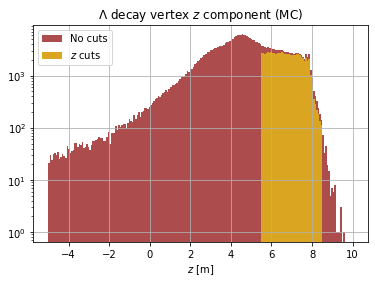

In [28]:
plt.hist(df_MC['L_ENDVERTEX_Z']/1000, bins=200, range=(-5,10),
         color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(df_MC_Filtered['L_ENDVERTEX_Z']/1000, bins=200, range=(-5,10),
         color='goldenrod', alpha=1, label="$z$ cuts", density=False)
plt.grid()
plt.yscale('log')
plt.title("$\Lambda$ decay vertex $z$ component (MC)")
plt.legend()
plt.xlabel("$z$ [m]")
#plt.savefig("mcvd/lambda_endvertex/LEVz_MC.pdf")
plt.show()

### $z-z_\text{true}$ (absolute)

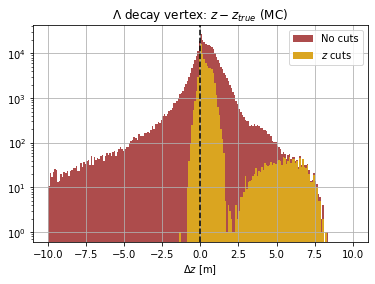

In [29]:
plt.hist((df_MC['L_ENDVERTEX_Z'] - df_MC['MCTRUTH_L_ENDVERTEX_Z'])/1000,
         range=(-10,10), bins=200, color='darkred',alpha=0.7, label='No cuts')
plt.hist((df_MC_Filtered['L_ENDVERTEX_Z'] - df_MC_Filtered['MCTRUTH_L_ENDVERTEX_Z'])/1000,
         range=(-10,10), bins=200, color='goldenrod', label='$z$ cuts')
plt.axvline(0,0,100,color='k', linestyle='--')
plt.grid()
plt.yscale('log')
plt.title('$\Lambda$ decay vertex: $z-z_{true}$ (MC)')
plt.xlabel('$\Delta z$ [m]')
plt.legend()
#plt.savefig("mcvd/lambda_endvertex/LEVz_MC_true-residuals.pdf")
plt.show()

### $z-z_\text{true}$ (relative)

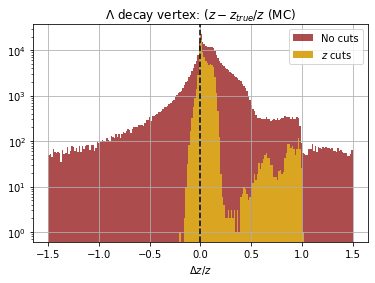

In [30]:
plt.hist((df_MC['L_ENDVERTEX_Z'] - df_MC['MCTRUTH_L_ENDVERTEX_Z'])/df_MC['L_ENDVERTEX_Z'],
         range=(-1.5,1.5), bins=200, color='darkred',alpha=0.7, label='No cuts')
plt.hist((df_MC_Filtered['L_ENDVERTEX_Z'] - df_MC_Filtered['MCTRUTH_L_ENDVERTEX_Z'])/df_MC_Filtered['L_ENDVERTEX_Z'],
         range=(-1.5,1.5), bins=200, color='goldenrod', label='$z$ cuts')
plt.axvline(0,0,100,color='k', linestyle='--')
plt.grid()
plt.yscale('log')
plt.title('$\Lambda$ decay vertex: $(z-z_{true}/z$ (MC)')
plt.xlabel('$\Delta z / z$')
plt.legend()
#plt.savefig("mcvd/lambda_endvertex/LEVz_MC_true-residuals.pdf")
plt.show()

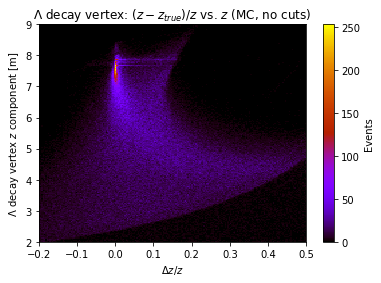

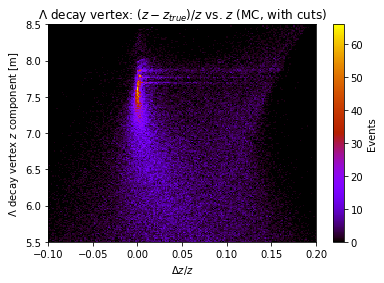

In [31]:
plt.hist2d((df_MC['L_ENDVERTEX_Z'] - df_MC['MCTRUTH_L_ENDVERTEX_Z'])/df_MC['L_ENDVERTEX_Z'], df_MC['L_ENDVERTEX_Z']/1000,
           bins=200, cmap='gnuplot', range=[[-0.2,0.5],[2,9]])
plt.xlabel('$\Delta z / z$')
plt.ylabel("$\Lambda$ decay vertex $z$ component [m]")
plt.title('$\Lambda$ decay vertex: $(z-z_{true})/z$ vs. $z$ (MC, no cuts)')
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC_Filtered['L_ENDVERTEX_Z'] - df_MC_Filtered['MCTRUTH_L_ENDVERTEX_Z'])/df_MC_Filtered['L_ENDVERTEX_Z'],
           df_MC_Filtered['L_ENDVERTEX_Z']/1000, bins=200, cmap='gnuplot', range=[[-0.1,0.2],[5.5,8.5]])
plt.xlabel('$\Delta z / z$')
plt.ylabel("$\Lambda$ decay vertex $z$ component [m]")
plt.title('$\Lambda$ decay vertex: $(z-z_{true})/z$ vs. $z$ (MC, with cuts)')
plt.colorbar(label='Events')
#plt.axvline(0,0,100,color='w', linestyle='--', linewidth=0.5)
plt.show()

# $\Lambda$ invariant mass
## DTF_FixJPsi

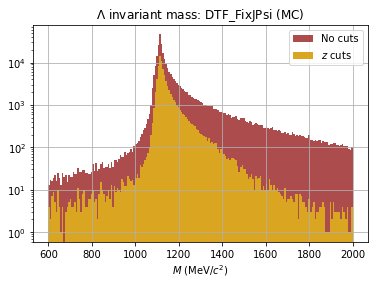

In [32]:
plt.hist(df_MC['DTF_FixJPsi_L_M'],bins=200,
         range=(600,2000), color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(df_MC_Filtered['DTF_FixJPsi_L_M'],bins=200,
         range=(600,2000), color='goldenrod', alpha=1, label="$z$ cuts", density=False)
plt.grid()
plt.yscale('log')
plt.xlabel("$M$ (MeV/$c^2$)")
plt.title("$\Lambda$ invariant mass: DTF_FixJPsi (MC)")
plt.legend()
#plt.savefig("mcvd/lambda_invariant-mass/LIM_DTF-FixJPsi_MC.pdf")
plt.show()

## DTF_FixJPsiLambda

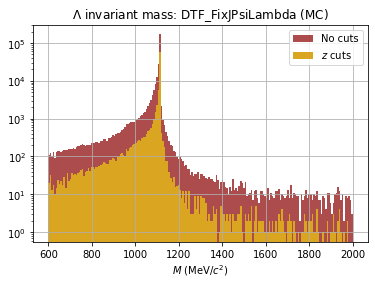

In [33]:
plt.hist(df_MC['DTF_FixJPsiLambda_L_M'],bins=200,
         range=(600,2000), color='darkred', alpha=0.7, label="No cuts", density=False)
plt.hist(df_MC_Filtered['DTF_FixJPsiLambda_L_M'],bins=200,
         range=(600,2000), color='goldenrod', alpha=1, label="$z$ cuts", density=False)
plt.grid()
plt.yscale('log')
plt.xlabel("$M$ (MeV/$c^2$)")
plt.title("$\Lambda$ invariant mass: DTF_FixJPsiLambda (MC)")
plt.legend()
#plt.savefig("mcvd/lambda_invariant-mass/LIM_DTF-FixJPsiLambda_MC.pdf")
plt.show()

# $\Lambda$ vertex fit $\chi^2$

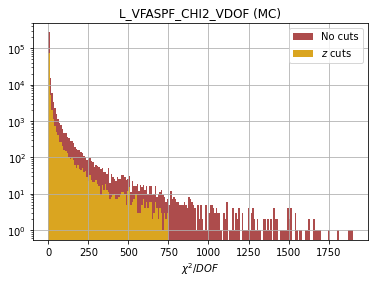

In [34]:
plt.hist(df_MC['L_VFASPF_CHI2_VDOF'], bins=200,
         range=(0,1900), color='darkred', label="No cuts", alpha=0.7)
plt.hist(df_MC_Filtered['L_VFASPF_CHI2_VDOF'], bins=200,
         range=(0,1900), color='goldenrod', label="$z$ cuts", alpha=1)
plt.yscale('log')
plt.grid()
plt.title("L_VFASPF_CHI2_VDOF (MC)")
plt.legend()
plt.xlabel("$\chi^2 / DOF$")
#plt.savefig("mcvd/lambda_vertex-fit/LVF_VFASPF_CHI2_VDOF_MC.pdf")
plt.show()

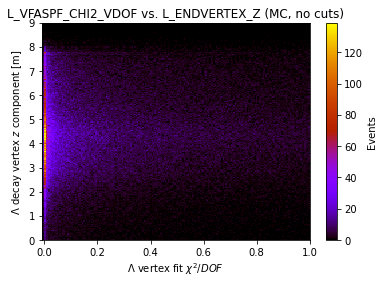

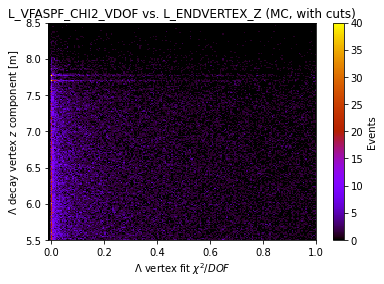

In [35]:
plt.hist2d(df_MC['L_VFASPF_CHI2_VDOF'], df_MC['L_ENDVERTEX_Z']/1000, bins=200, cmap='gnuplot',
          range=[[-0.01,1],[0,9]])
plt.xlabel("$\Lambda$ vertex fit $\chi^2 / DOF$")
plt.ylabel("$\Lambda$ decay vertex $z$ component [m]")
plt.title("L_VFASPF_CHI2_VDOF vs. L_ENDVERTEX_Z (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_MC_Filtered['L_VFASPF_CHI2_VDOF'], df_MC_Filtered['L_ENDVERTEX_Z']/1000, bins=200, cmap='gnuplot',
          range=[[-0.01,1],[5.5,8.5]])
plt.xlabel("$\Lambda$ vertex fit $\chi^2 / DOF$")
plt.ylabel("$\Lambda$ decay vertex $z$ component [m]")
plt.title("L_VFASPF_CHI2_VDOF vs. L_ENDVERTEX_Z (MC, with cuts)")
plt.colorbar(label='Events')
plt.show()

# $\Lambda_b$ vertex fit $\chi^2$

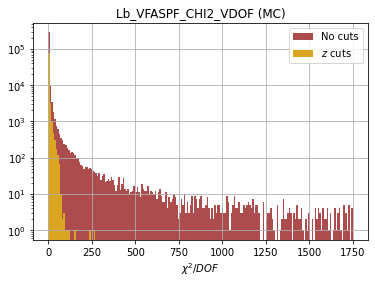

In [36]:
plt.hist(df_MC['Lb_VFASPF_CHI2_VDOF'], bins=200,
         range=(0,1750), color='darkred', label="No cuts", alpha=0.7)
plt.hist(df_MC_Filtered['Lb_VFASPF_CHI2_VDOF'], bins=200,
         range=(0,1750), color='goldenrod', label="$z$ cuts", alpha=1)
plt.yscale('log')
plt.grid()
plt.title("Lb_VFASPF_CHI2_VDOF (MC)")
plt.legend()
plt.xlabel("$\chi^2 / DOF$")
#plt.savefig("mcvd/lambdab_vertex-fit/LbVF_VFASPF_CHI2_VDOF_MC.pdf")
plt.show()

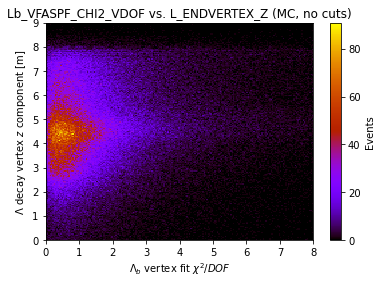

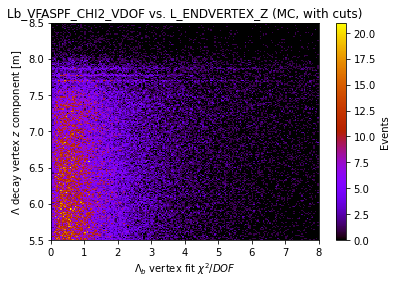

In [37]:
plt.hist2d(df_MC['Lb_VFASPF_CHI2_VDOF'], df_MC['L_ENDVERTEX_Z']/1000, bins=200, cmap='gnuplot',
          range=[[0,8],[0,9]])
plt.xlabel("$\Lambda_b$ vertex fit $\chi^2 / DOF$")
plt.ylabel("$\Lambda$ decay vertex $z$ component [m]")
plt.title("Lb_VFASPF_CHI2_VDOF vs. L_ENDVERTEX_Z (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_MC_Filtered['Lb_VFASPF_CHI2_VDOF'], df_MC_Filtered['L_ENDVERTEX_Z']/1000, bins=200, cmap='gnuplot',
          range=[[0,8],[5.5,8.5]])
plt.xlabel("$\Lambda_b$ vertex fit $\chi^2 / DOF$")
plt.ylabel("$\Lambda$ decay vertex $z$ component [m]")
plt.title("Lb_VFASPF_CHI2_VDOF vs. L_ENDVERTEX_Z (MC, with cuts)")
plt.colorbar(label='Events')
plt.show()

# Proton momentum
## $x$ component

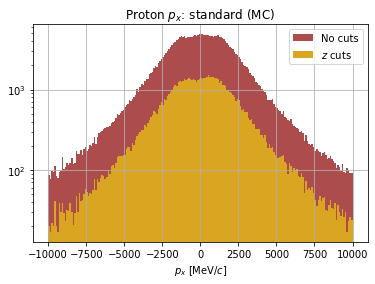

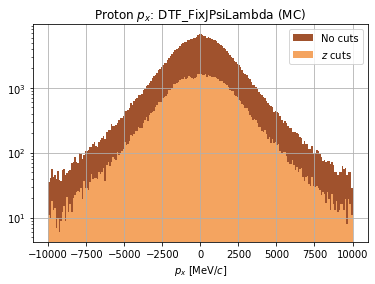

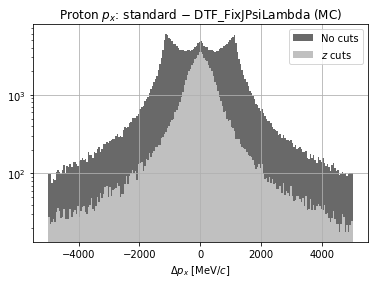

In [38]:
plt.hist(df_MC['p_PX'], bins=200, range=(-1e4,1e4), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered['p_PX'], bins=200, range=(-1e4,1e4),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

plt.hist(df_MC['DTF_FixJPsiLambda_p_PX'], range=(-1e4,1e4),
         bins=200, color='sienna', alpha=1, label="No cuts")
plt.hist(df_MC_Filtered['DTF_FixJPsiLambda_p_PX'], range=(-1e4,1e4),
         bins=200, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_DTF_MC.pdf")
plt.show()

plt.hist(df_MC['p_PX'] - df_MC['DTF_FixJPsiLambda_p_PX'],
         range=(-5000,5000), bins=200, color='dimgray', alpha=1, label='No cuts')
plt.hist(df_MC_Filtered['p_PX'] - df_MC_Filtered['DTF_FixJPsiLambda_p_PX'],
         range=(-5000,5000), bins=200, color='silver', alpha=1, label='$z$ cuts')
plt.grid()
plt.xlabel("$\Delta p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: standard $-$ DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_STANDARD-minus-DTF_MC.pdf")
plt.show()

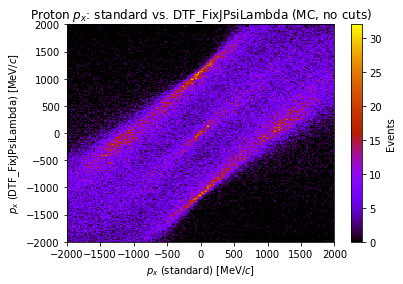

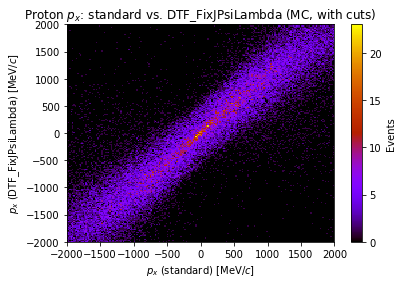

In [39]:
plt.hist2d(df_MC['p_PX'], df_MC['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='gnuplot',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x$ (standard) [MeV/$c$]")
plt.ylabel("$p_x$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_x$: standard vs. DTF_FixJPsiLambda (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_MC_Filtered['p_PX'], df_MC_Filtered['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='gnuplot',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x$ (standard) [MeV/$c$]")
plt.ylabel("$p_x$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_x$: standard vs. DTF_FixJPsiLambda (MC, with cuts)")
plt.colorbar(label='Events')
plt.show()

### $p_x - {p_x}^\text{true}$

/afs/cern.ch/user/a/adegenna/venus/lib/python3.8/site-packages/numpy/ma/core.py:6846: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


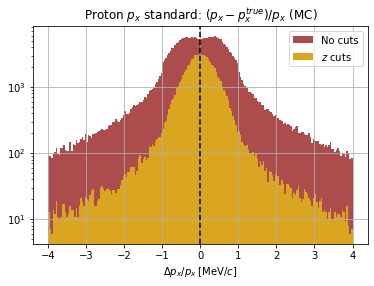

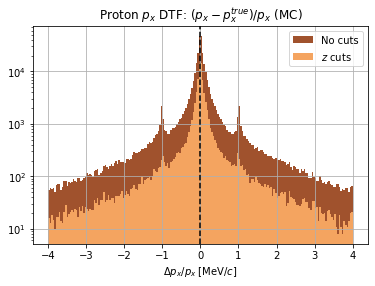

In [40]:
plt.hist((df_MC['p_PX'] - df_MC['MCTRUTH_p_PX'])/abs(df_MC['p_PX']), bins=200,
         range=(-4,4), color='darkred', alpha=0.7, label="No cuts")
plt.hist((df_MC_Filtered['p_PX'] - df_MC_Filtered['MCTRUTH_p_PX'])/abs(df_MC_Filtered['p_PX']),
         bins=200, range=(-4,4), color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$\Delta p_x / p_x$ [MeV/$c$]")
plt.title("Proton $p_x$ standard: $(p_x - p_x^{true})/p_x$ (MC)")
plt.legend()
plt.axvline(0,0,100,color='k',linestyle='--')
plt.show()

plt.hist((df_MC['DTF_FixJPsiLambda_p_PX'] - df_MC['MCTRUTH_p_PX'])/abs(df_MC['DTF_FixJPsiLambda_p_PX']), range=(-4,4),
         bins=200, color='sienna', alpha=1, label="No cuts")
plt.hist((df_MC_Filtered['DTF_FixJPsiLambda_p_PX'] 
          - df_MC_Filtered['MCTRUTH_p_PX'])/abs(df_MC_Filtered['DTF_FixJPsiLambda_p_PX']), range=(-4,4),
         bins=200, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$\Delta p_x / p_x$ [MeV/$c$]")
plt.title("Proton $p_x$ DTF: $(p_x - p_x^{true})/p_x$ (MC)")
plt.legend()
plt.yscale('log')
plt.axvline(0,0,100,color='k',linestyle='--')
plt.show()

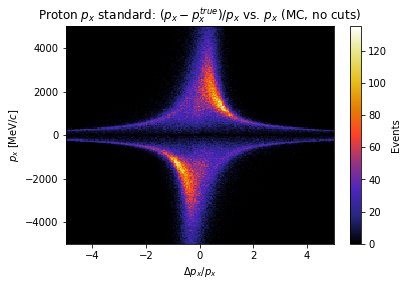

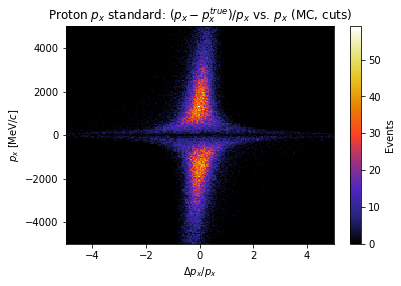

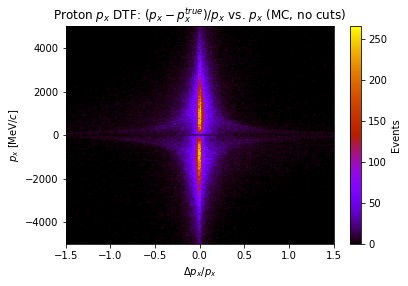

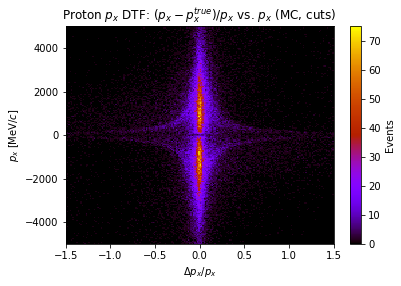

In [41]:
plt.hist2d((df_MC['p_PX'] - df_MC['MCTRUTH_p_PX'])/abs(df_MC['p_PX']),
           df_MC['p_PX'], bins=200, cmap='CMRmap',
          range=[[-5,5],[-5e3,5e3]])
plt.xlabel("$\Delta p_x / p_x$")
plt.ylabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$ standard: $(p_x - p_x^{true})/p_x$ vs. $p_x$ (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC_Filtered['p_PX'] - df_MC_Filtered['MCTRUTH_p_PX'])/abs(df_MC_Filtered['p_PX']),
           df_MC_Filtered['p_PX'], bins=200, cmap='CMRmap',
          range=[[-5,5],[-5e3,5e3]])
plt.xlabel("$\Delta p_x / p_x$")
plt.ylabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$ standard: $(p_x - p_x^{true})/p_x$ vs. $p_x$ (MC, cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC['DTF_FixJPsiLambda_p_PX'] - df_MC['MCTRUTH_p_PX'])/abs(df_MC['DTF_FixJPsiLambda_p_PX']),
           df_MC['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='gnuplot',
          range=[[-1.5,1.5],[-5e3,5e3]])
plt.xlabel("$\Delta p_x / p_x$")
plt.ylabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$ DTF: $(p_x - p_x^{true})/p_x$ vs. $p_x$ (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC_Filtered['DTF_FixJPsiLambda_p_PX'] - df_MC_Filtered['MCTRUTH_p_PX'])/abs(df_MC_Filtered['DTF_FixJPsiLambda_p_PX']),
           df_MC_Filtered['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='gnuplot',
          range=[[-1.5,1.5],[-5e3,5e3]])
plt.xlabel("$\Delta p_x / p_x$")
plt.ylabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$ DTF: $(p_x - p_x^{true})/p_x$ vs. $p_x$ (MC, cuts)")
plt.colorbar(label='Events')
plt.show()

This next plot is only to prove a point.

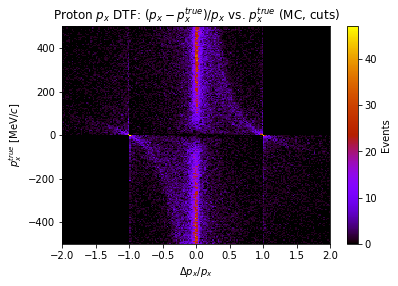

In [42]:
plt.hist2d((df_MC['DTF_FixJPsiLambda_p_PX'] - df_MC['MCTRUTH_p_PX'])/abs(df_MC['DTF_FixJPsiLambda_p_PX']),
           df_MC['MCTRUTH_p_PX'], bins=200, cmap='gnuplot',
          range=[[-2,2],[-500,500]])
plt.xlabel("$\Delta p_x / p_x$")
plt.ylabel("$p_x^{true}$ [MeV/$c$]")
plt.title("Proton $p_x$ DTF: $(p_x - p_x^{true})/p_x$ vs. $p_x^{true}$ (MC, cuts)")
plt.colorbar(label='Events')
plt.show()

Substructures at $\Delta p_x / p_x = 1$ are results of very low $p_x^\text{true}$ events (reconstructed as any large value, they will yield $\approx 1$).

## $y$ component

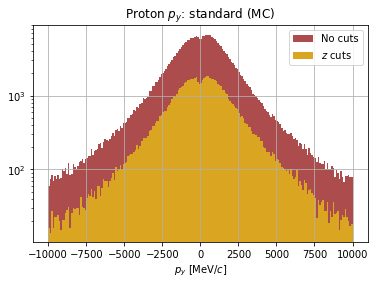

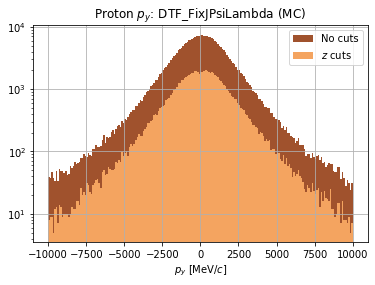

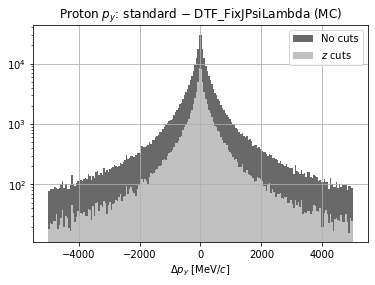

In [43]:
plt.hist(df_MC['p_PY'], bins=200, range=(-1e4,1e4), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered['p_PY'], bins=200, range=(-1e4,1e4),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_y$ [MeV/$c$]")
plt.title("Proton $p_y$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

plt.hist(df_MC['DTF_FixJPsiLambda_p_PY'], range=(-1e4,1e4),
         bins=200, color='sienna', alpha=1, label="No cuts")
plt.hist(df_MC_Filtered['DTF_FixJPsiLambda_p_PY'], range=(-1e4,1e4),
         bins=200, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p_y$ [MeV/$c$]")
plt.title("Proton $p_y$: DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_DTF_MC.pdf")
plt.show()

plt.hist(df_MC['p_PY'] - df_MC['DTF_FixJPsiLambda_p_PY'],
         range=(-5000,5000), bins=200, color='dimgray', alpha=1, label='No cuts')
plt.hist(df_MC_Filtered['p_PY'] - df_MC_Filtered['DTF_FixJPsiLambda_p_PY'],
         range=(-5000,5000), bins=200, color='silver', alpha=1, label='$z$ cuts')
plt.grid()
plt.xlabel("$\Delta p_y$ [MeV/$c$]")
plt.title("Proton $p_y$: standard $-$ DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_STANDARD-minus-DTF_MC.pdf")
plt.show()

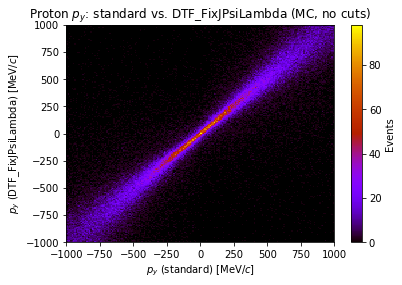

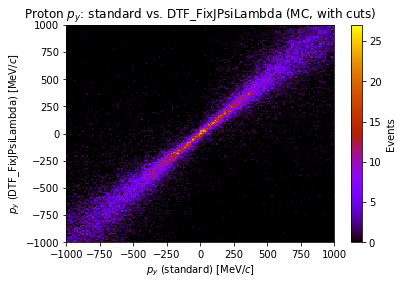

In [44]:
plt.hist2d(df_MC['p_PY'], df_MC['DTF_FixJPsiLambda_p_PY'], bins=200, cmap='gnuplot',
          range=[[-1e3,1e3],[-1e3,1e3]])
plt.xlabel("$p_y$ (standard) [MeV/$c$]")
plt.ylabel("$p_y$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_y$: standard vs. DTF_FixJPsiLambda (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_MC_Filtered['p_PY'], df_MC_Filtered['DTF_FixJPsiLambda_p_PY'], bins=200, cmap='gnuplot',
          range=[[-1e3,1e3],[-1e3,1e3]])
plt.xlabel("$p_y$ (standard) [MeV/$c$]")
plt.ylabel("$p_y$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_y$: standard vs. DTF_FixJPsiLambda (MC, with cuts)")
plt.colorbar(label='Events')
plt.show()

### $p_y-p_y^\text{true}$

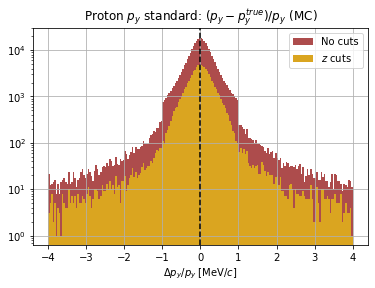

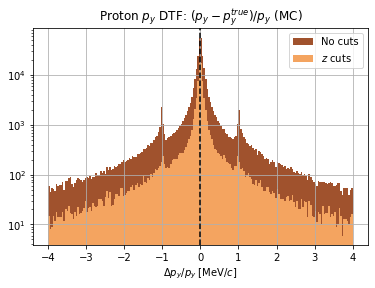

In [45]:
plt.hist((df_MC['p_PY'] - df_MC['MCTRUTH_p_PY'])/abs(df_MC['p_PY']), bins=200,
         range=(-4,4), color='darkred', alpha=0.7, label="No cuts")
plt.hist((df_MC_Filtered['p_PY'] - df_MC_Filtered['MCTRUTH_p_PY'])/abs(df_MC_Filtered['p_PY']),
         bins=200, range=(-4,4), color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$\Delta p_y / p_y$ [MeV/$c$]")
plt.title("Proton $p_y$ standard: $(p_y - p_y^{true})/p_y$ (MC)")
plt.legend()
plt.axvline(0,0,100,color='k',linestyle='--')
plt.show()

plt.hist((df_MC['DTF_FixJPsiLambda_p_PY'] - df_MC['MCTRUTH_p_PY'])/abs(df_MC['DTF_FixJPsiLambda_p_PY']), range=(-4,4),
         bins=200, color='sienna', alpha=1, label="No cuts")
plt.hist((df_MC_Filtered['DTF_FixJPsiLambda_p_PY'] 
          - df_MC_Filtered['MCTRUTH_p_PY'])/abs(df_MC_Filtered['DTF_FixJPsiLambda_p_PY']), range=(-4,4),
         bins=200, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$\Delta p_y / p_y$ [MeV/$c$]")
plt.title("Proton $p_y$ DTF: $(p_y - p_y^{true})/p_y$ (MC)")
plt.legend()
plt.yscale('log')
plt.axvline(0,0,100,color='k',linestyle='--')
plt.show()

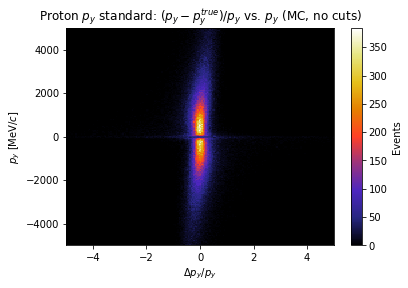

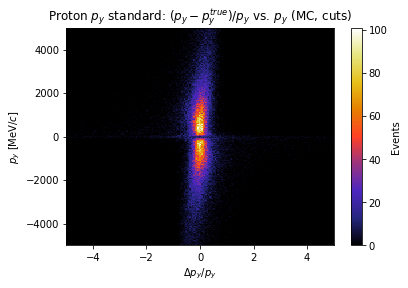

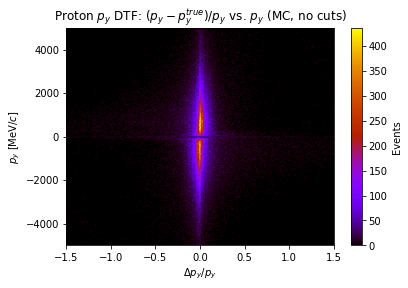

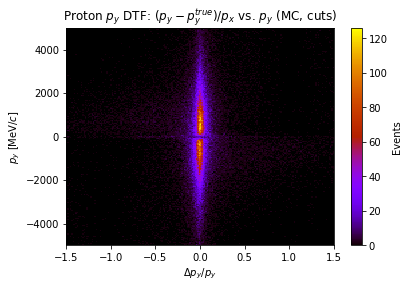

In [46]:
plt.hist2d((df_MC['p_PY'] - df_MC['MCTRUTH_p_PY'])/abs(df_MC['p_PY']),
           df_MC['p_PY'], bins=200, cmap='CMRmap',
          range=[[-5,5],[-5e3,5e3]])
plt.xlabel("$\Delta p_y / p_y$")
plt.ylabel("$p_y$ [MeV/$c$]")
plt.title("Proton $p_y$ standard: $(p_y - p_y^{true})/p_y$ vs. $p_y$ (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC_Filtered['p_PY'] - df_MC_Filtered['MCTRUTH_p_PY'])/abs(df_MC_Filtered['p_PY']),
           df_MC_Filtered['p_PY'], bins=200, cmap='CMRmap',
          range=[[-5,5],[-5e3,5e3]])
plt.xlabel("$\Delta p_y / p_y$")
plt.ylabel("$p_y$ [MeV/$c$]")
plt.title("Proton $p_y$ standard: $(p_y - p_y^{true})/p_y$ vs. $p_y$ (MC, cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC['DTF_FixJPsiLambda_p_PY'] - df_MC['MCTRUTH_p_PY'])/abs(df_MC['DTF_FixJPsiLambda_p_PY']),
           df_MC['DTF_FixJPsiLambda_p_PY'], bins=200, cmap='gnuplot',
          range=[[-1.5,1.5],[-5e3,5e3]])
plt.xlabel("$\Delta p_y / p_y$")
plt.ylabel("$p_y$ [MeV/$c$]")
plt.title("Proton $p_y$ DTF: $(p_y - p_y^{true})/p_y$ vs. $p_y$ (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC_Filtered['DTF_FixJPsiLambda_p_PY'] - df_MC_Filtered['MCTRUTH_p_PY'])/abs(df_MC_Filtered['DTF_FixJPsiLambda_p_PY']),
           df_MC_Filtered['DTF_FixJPsiLambda_p_PY'], bins=200, cmap='gnuplot',
          range=[[-1.5,1.5],[-5e3,5e3]])
plt.xlabel("$\Delta p_y / p_y$")
plt.ylabel("$p_y$ [MeV/$c$]")
plt.title("Proton $p_y$ DTF: $(p_y - p_y^{true})/p_x$ vs. $p_y$ (MC, cuts)")
plt.colorbar(label='Events')
plt.show()

## $z$ component

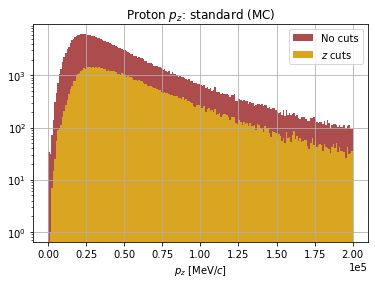

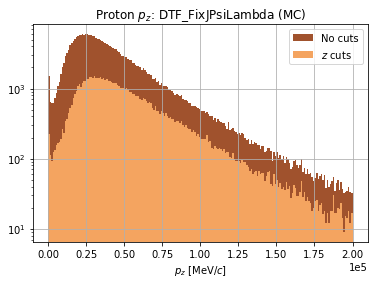

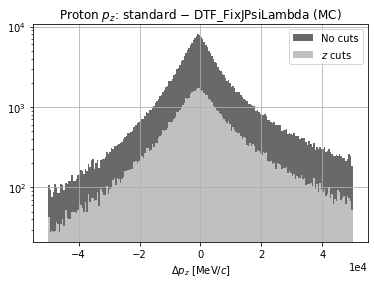

In [47]:
plt.hist(df_MC['p_PZ'], bins=200, range=(0,2e5),
         color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered['p_PZ'], bins=200, range=(0,2e5),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p_z$ [MeV/$c$]")
plt.title("Proton $p_z$: standard (MC)")
plt.legend()
plt.yscale('log')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#plt.savefig("mcvd/proton_momentum/pz_STANDARD_MC.pdf")
plt.show()

plt.hist(df_MC['DTF_FixJPsiLambda_p_PZ'],
         range=(0,2e5), bins=200, color='sienna', alpha=1, label="No cuts")
plt.hist(df_MC_Filtered['DTF_FixJPsiLambda_p_PZ'],
         range=(0,2e5), bins=200, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p_z$ [MeV/$c$]")
plt.title("Proton $p_z$: DTF_FixJPsiLambda (MC)")
plt.legend()
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/pz_DTF_MC.pdf")
plt.show()

plt.hist(df_MC['p_PZ'] - df_MC['DTF_FixJPsiLambda_p_PZ'],
         range=(-5e4,5e4), bins=200, color='dimgray', alpha=1, label='No cuts')
plt.hist(df_MC_Filtered['p_PZ']
         - df_MC_Filtered['DTF_FixJPsiLambda_p_PZ'],
         range=(-5e4,5e4), bins=200, color='silver', alpha=1, label='$z$ cuts')
plt.grid()
plt.xlabel("$\Delta p_z$ [MeV/$c$]")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title("Proton $p_z$: standard $-$ DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/pz_STANDARD-minus-DTF_MC.pdf")
plt.show()

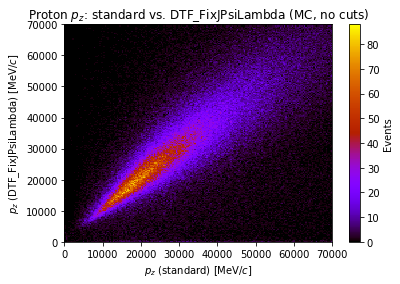

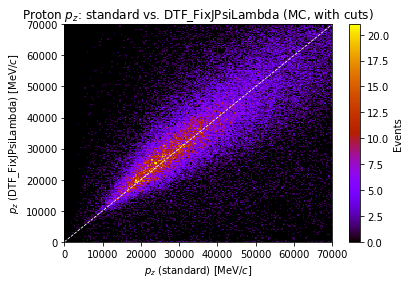

In [48]:
plt.hist2d(df_MC['p_PZ'], df_MC['DTF_FixJPsiLambda_p_PZ'], bins=200, cmap='gnuplot',
          range=[[0,7e4],[0,7e4]])
plt.xlabel("$p_z$ (standard) [MeV/$c$]")
plt.ylabel("$p_z$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_z$: standard vs. DTF_FixJPsiLambda (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_MC_Filtered['p_PZ'], df_MC_Filtered['DTF_FixJPsiLambda_p_PZ'], bins=200, cmap='gnuplot',
          range=[[0,7e4],[0,7e4]])
plt.xlabel("$p_z$ (standard) [MeV/$c$]")
plt.ylabel("$p_z$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("Proton $p_z$: standard vs. DTF_FixJPsiLambda (MC, with cuts)")
plt.colorbar(label='Events')
plt.plot([0,7e4],[0,7e4], color='w', linestyle='--', linewidth=0.8)
plt.show()

### $p_z-p_z^\text{true}$

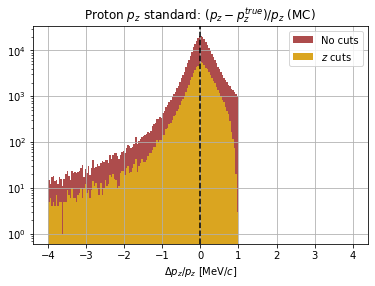

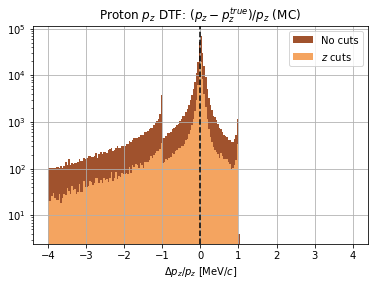

In [49]:
plt.hist((df_MC['p_PZ'] - df_MC['MCTRUTH_p_PZ'])/abs(df_MC['p_PZ']), bins=200,
         range=(-4,4), color='darkred', alpha=0.7, label="No cuts")
plt.hist((df_MC_Filtered['p_PZ'] - df_MC_Filtered['MCTRUTH_p_PZ'])/abs(df_MC_Filtered['p_PZ']),
         bins=200, range=(-4,4), color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$\Delta p_z / p_z$ [MeV/$c$]")
plt.title("Proton $p_z$ standard: $(p_z - p_z^{true})/p_z$ (MC)")
plt.legend()
plt.axvline(0,0,100,color='k',linestyle='--')
plt.show()

plt.hist((df_MC['DTF_FixJPsiLambda_p_PZ'] - df_MC['MCTRUTH_p_PZ'])/abs(df_MC['DTF_FixJPsiLambda_p_PZ']), range=(-4,4),
         bins=200, color='sienna', alpha=1, label="No cuts")
plt.hist((df_MC_Filtered['DTF_FixJPsiLambda_p_PZ'] 
          - df_MC_Filtered['MCTRUTH_p_PZ'])/abs(df_MC_Filtered['DTF_FixJPsiLambda_p_PZ']), range=(-4,4),
         bins=200, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$\Delta p_z / p_z$ [MeV/$c$]")
plt.title("Proton $p_z$ DTF: $(p_z - p_z^{true})/p_z$ (MC)")
plt.legend()
plt.yscale('log')
plt.axvline(0,0,100,color='k',linestyle='--')
plt.show()

In [50]:
## Proton
print("Max value of relative standard resolution: ", ((df_MC['p_PZ'] - df_MC['MCTRUTH_p_PZ'])/abs(df_MC['p_PZ'])).max())
print("Max value of relative DTF resolution: ", ((df_MC['DTF_FixJPsiLambda_p_PZ'] - df_MC['MCTRUTH_p_PZ'])/abs(df_MC['DTF_FixJPsiLambda_p_PZ'])).max())

Max value of relative standard resolution:  0.9994037
Max value of relative DTF resolution:  1.0


In [51]:
## Pion
print("Max value of relative standard resolution: ", ((df_MC['pim_PZ'] - df_MC['MCTRUTH_pim_PZ'])/abs(df_MC['pim_PZ'])).max())
print("Max value of relative DTF resolution: ", ((df_MC['DTF_FixJPsiLambda_pim_PZ'] - df_MC['MCTRUTH_pim_PZ'])/abs(df_MC['DTF_FixJPsiLambda_pim_PZ'])).max())

Max value of relative standard resolution:  0.9996985
Max value of relative DTF resolution:  1.0


Seems like the DTF $z$-momentums related to the $\Lambda$ decay all have a hard cut (the muons seem not to). But why? And why only on one side?

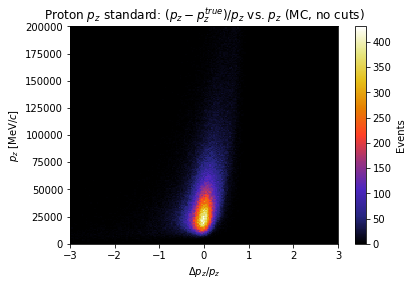

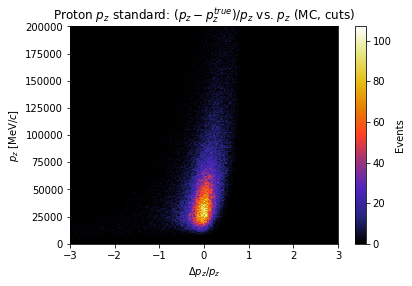

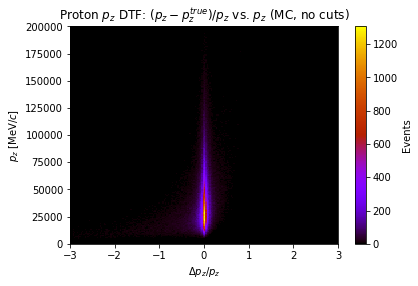

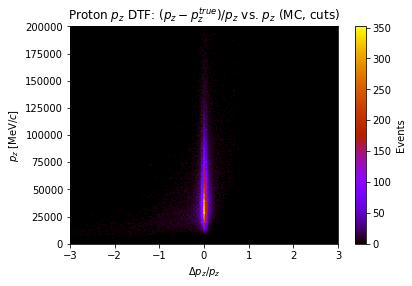

In [52]:
plt.hist2d((df_MC['p_PZ'] - df_MC['MCTRUTH_p_PZ'])/abs(df_MC['p_PZ']),
           df_MC['p_PZ'], bins=200, cmap='CMRmap',
          range=[[-3,3],[0,2e5]])
plt.xlabel("$\Delta p_z / p_z$")
plt.ylabel("$p_z$ [MeV/$c$]")
plt.title("Proton $p_z$ standard: $(p_z - p_z^{true})/p_z$ vs. $p_z$ (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC_Filtered['p_PZ'] - df_MC_Filtered['MCTRUTH_p_PZ'])/abs(df_MC_Filtered['p_PZ']),
           df_MC_Filtered['p_PZ'], bins=200, cmap='CMRmap',
          range=[[-3,3],[0,2e5]])
plt.xlabel("$\Delta p_z / p_z$")
plt.ylabel("$p_z$ [MeV/$c$]")
plt.title("Proton $p_z$ standard: $(p_z - p_z^{true})/p_z$ vs. $p_z$ (MC, cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC['DTF_FixJPsiLambda_p_PZ'] - df_MC['MCTRUTH_p_PZ'])/abs(df_MC['DTF_FixJPsiLambda_p_PZ']),
           df_MC['DTF_FixJPsiLambda_p_PZ'], bins=200, cmap='gnuplot',
          range=[[-3,3],[0,2e5]])
plt.xlabel("$\Delta p_z / p_z$")
plt.ylabel("$p_z$ [MeV/$c$]")
plt.title("Proton $p_z$ DTF: $(p_z - p_z^{true})/p_z$ vs. $p_z$ (MC, no cuts)")
plt.colorbar(label='Events')
plt.show()

plt.hist2d((df_MC_Filtered['DTF_FixJPsiLambda_p_PZ'] - df_MC_Filtered['MCTRUTH_p_PZ'])/abs(df_MC_Filtered['DTF_FixJPsiLambda_p_PZ']),
           df_MC_Filtered['DTF_FixJPsiLambda_p_PZ'], bins=200, cmap='gnuplot',
          range=[[-3,3],[0,2e5]])
plt.xlabel("$\Delta p_z / p_z$")
plt.ylabel("$p_z$ [MeV/$c$]")
plt.title("Proton $p_z$ DTF: $(p_z - p_z^{true})/p_z$ vs. $p_z$ (MC, cuts)")
plt.colorbar(label='Events')
plt.show()

# $\Lambda$ momentum

## Modulus

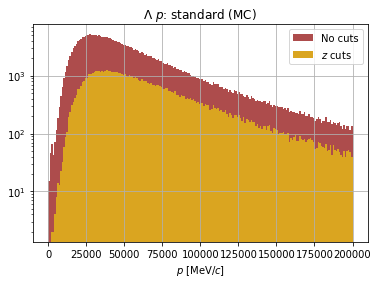

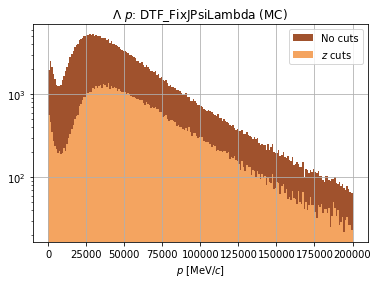

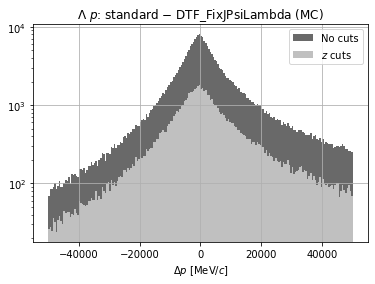

In [53]:
df_MC_L_P = np.sqrt(df_MC['L_PX']**2 + df_MC['L_PY']**2 + df_MC['L_PZ']**2)
df_MC_Filtered_L_P = np.sqrt(df_MC_Filtered['L_PX']**2 + df_MC_Filtered['L_PY']**2 + df_MC_Filtered['L_PZ']**2)

plt.hist(df_MC_L_P, bins=200, range=(0,2e5), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered_L_P, bins=200, range=(0,2e5),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p$ [MeV/$c$]")
plt.title("$\Lambda$ $p$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

plt.hist(df_MC['DTF_FixJPsiLambda_L_P'], range=(0,2e5),
         bins=200, color='sienna', alpha=1, label="No cuts")
plt.hist(df_MC_Filtered['DTF_FixJPsiLambda_L_P'], range=(0,2e5),
         bins=200, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p$ [MeV/$c$]")
plt.title("$\Lambda$ $p$: DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_DTF_MC.pdf")
plt.show()

plt.hist(df_MC_L_P - df_MC['DTF_FixJPsiLambda_L_P'],
         range=(-5e4,5e4), bins=200, color='dimgray', alpha=1, label='No cuts')
plt.hist(df_MC_Filtered_L_P - df_MC_Filtered['DTF_FixJPsiLambda_L_P'],
         range=(-5e4,5e4), bins=200, color='silver', alpha=1, label='$z$ cuts')
plt.grid()
plt.xlabel("$\Delta p$ [MeV/$c$]")
plt.title("$\Lambda$ $p$: standard $-$ DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_STANDARD-minus-DTF_MC.pdf")
plt.show()

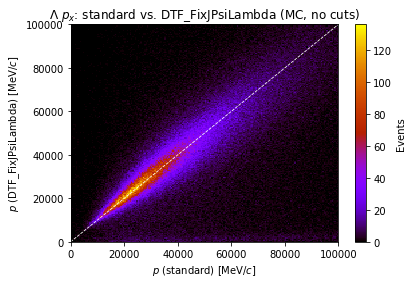

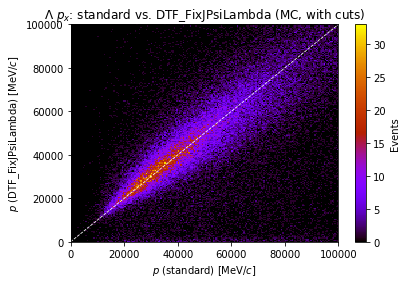

In [54]:
plt.hist2d(df_MC_L_P, df_MC['DTF_FixJPsiLambda_L_P'], bins=200, cmap='gnuplot',
          range=[[0,1e5],[0,1e5]])
plt.xlabel("$p$ (standard) [MeV/$c$]")
plt.ylabel("$p$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("$\Lambda$ $p_x$: standard vs. DTF_FixJPsiLambda (MC, no cuts)")
plt.colorbar(label='Events')
plt.plot([0,1e5],[0,1e5], color='w', linestyle='--', linewidth=0.8)
plt.show()

plt.hist2d(df_MC_Filtered_L_P, df_MC_Filtered['DTF_FixJPsiLambda_L_P'], bins=200, cmap='gnuplot',
          range=[[0,1e5],[0,1e5]])
plt.xlabel("$p$ (standard) [MeV/$c$]")
plt.ylabel("$p$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("$\Lambda$ $p_x$: standard vs. DTF_FixJPsiLambda (MC, with cuts)")
plt.colorbar(label='Events')
plt.plot([0,1e5],[0,1e5], color='w', linestyle='--', linewidth=0.8)
plt.show()

## $x$ component
Reminder: compare to true values

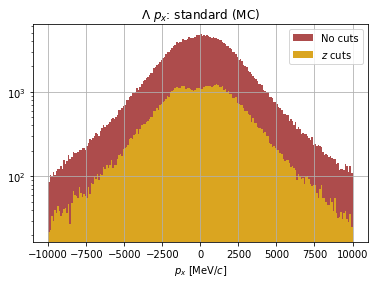

In [55]:
plt.hist(df_MC['L_PX'], bins=200, range=(-1e4,1e4), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered['L_PX'], bins=200, range=(-1e4,1e4),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("$\Lambda$ $p_x$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

## $y$ component

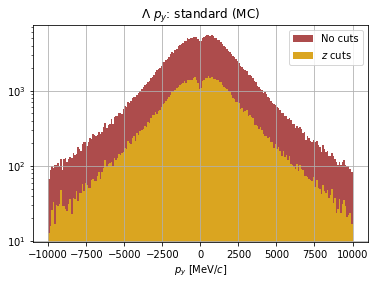

In [56]:
plt.hist(df_MC['L_PY'], bins=200, range=(-1e4,1e4), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered['L_PY'], bins=200, range=(-1e4,1e4),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_y$ [MeV/$c$]")
plt.title("$\Lambda$ $p_y$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

## $z$ component

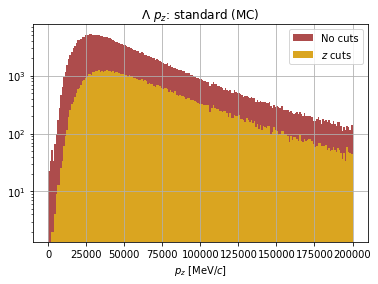

In [57]:
plt.hist(df_MC['L_PZ'], bins=200, range=(0,2e5), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered['L_PZ'], bins=200, range=(0,2e5),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_z$ [MeV/$c$]")
plt.title("$\Lambda$ $p_z$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

# $\Lambda_b$ momentum

## Modulus

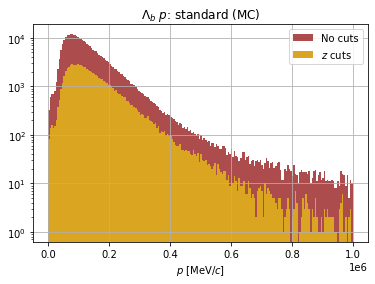

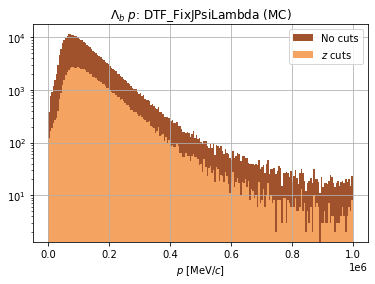

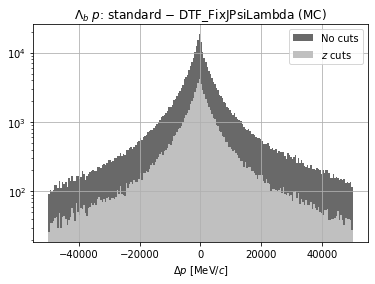

In [58]:
df_MC_Lb_P = np.sqrt(df_MC['Lb_PX']**2 + df_MC['Lb_PY']**2 + df_MC['Lb_PZ']**2)
df_MC_Filtered_Lb_P = np.sqrt(df_MC_Filtered['Lb_PX']**2 + df_MC_Filtered['Lb_PY']**2 + df_MC_Filtered['Lb_PZ']**2)

plt.hist(df_MC_Lb_P, bins=200, range=(0,1e6), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered_Lb_P, bins=200, range=(0,1e6),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p$ [MeV/$c$]")
plt.title("$\Lambda_b$ $p$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

plt.hist(df_MC['DTF_FixJPsiLambda_Lb_P'], range=(0,1e6),
         bins=200, color='sienna', alpha=1, label="No cuts")
plt.hist(df_MC_Filtered['DTF_FixJPsiLambda_Lb_P'], range=(0,1e6),
         bins=200, color='sandybrown', alpha=1, label="$z$ cuts")
plt.grid()
plt.xlabel("$p$ [MeV/$c$]")
plt.title("$\Lambda_b$ $p$: DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_DTF_MC.pdf")
plt.show()

plt.hist(df_MC_Lb_P - df_MC['DTF_FixJPsiLambda_Lb_P'],
         range=(-5e4,5e4), bins=200, color='dimgray', alpha=1, label='No cuts')
plt.hist(df_MC_Filtered_Lb_P - df_MC_Filtered['DTF_FixJPsiLambda_Lb_P'],
         range=(-5e4,5e4), bins=200, color='silver', alpha=1, label='$z$ cuts')
plt.grid()
plt.xlabel("$\Delta p$ [MeV/$c$]")
plt.title("$\Lambda_b$ $p$: standard $-$ DTF_FixJPsiLambda (MC)")
plt.legend()
plt.yscale('log')
#plt.savefig("mcvd/proton_momentum/px_STANDARD-minus-DTF_MC.pdf")
plt.show()

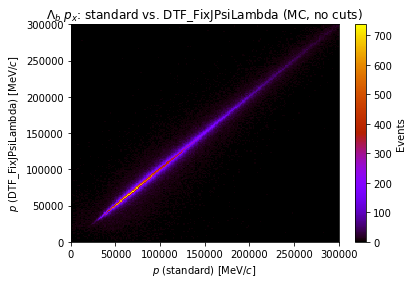

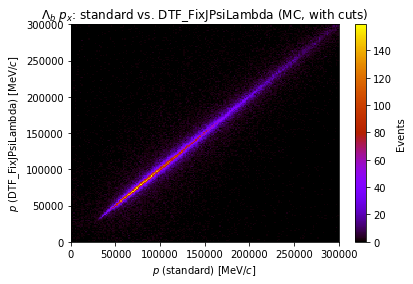

In [59]:
plt.hist2d(df_MC_Lb_P, df_MC['DTF_FixJPsiLambda_Lb_P'], bins=200, cmap='gnuplot',
          range=[[0,3e5],[0,3e5]])
plt.xlabel("$p$ (standard) [MeV/$c$]")
plt.ylabel("$p$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("$\Lambda_b$ $p_x$: standard vs. DTF_FixJPsiLambda (MC, no cuts)")
plt.colorbar(label='Events')
#plt.plot([0,1e6],[0,1e6], color='w', linestyle='--', linewidth=0.8)
plt.show()

plt.hist2d(df_MC_Filtered_Lb_P, df_MC_Filtered['DTF_FixJPsiLambda_Lb_P'], bins=200, cmap='gnuplot',
          range=[[0,3e5],[0,3e5]])
plt.xlabel("$p$ (standard) [MeV/$c$]")
plt.ylabel("$p$ (DTF_FixJPsiLambda) [MeV/$c$]")
plt.title("$\Lambda_b$ $p_x$: standard vs. DTF_FixJPsiLambda (MC, with cuts)")
plt.colorbar(label='Events')
#plt.plot([0,1e6],[0,1e6], color='w', linestyle='--', linewidth=0.8)
plt.show()

## $x$ component

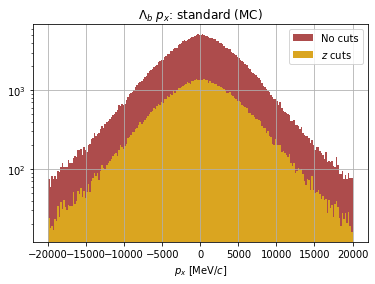

In [60]:
plt.hist(df_MC['Lb_PX'], bins=200, range=(-2e4,2e4), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered['Lb_PX'], bins=200, range=(-2e4,2e4),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("$\Lambda_b$ $p_x$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

## $y$ component

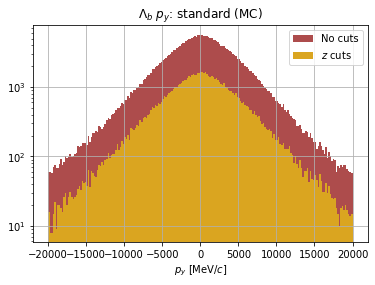

In [61]:
plt.hist(df_MC['Lb_PY'], bins=200, range=(-2e4,2e4), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered['Lb_PY'], bins=200, range=(-2e4,2e4),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_y$ [MeV/$c$]")
plt.title("$\Lambda_b$ $p_y$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

## $z$ component

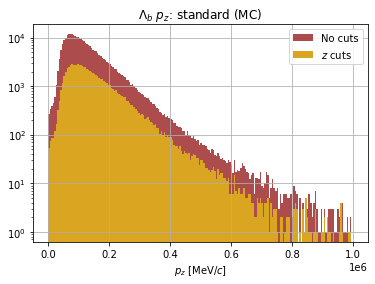

In [62]:
plt.hist(df_MC['Lb_PZ'], bins=200, range=(0,1e6), color='darkred', alpha=0.7, label="No cuts")
plt.hist(df_MC_Filtered['Lb_PZ'], bins=200, range=(0,1e6),
         color='goldenrod', alpha=1, label="$z$ cuts")
plt.grid()
plt.yscale('log')
plt.xlabel("$p_z$ [MeV/$c$]")
plt.title("$\Lambda_b$ $p_z$: standard (MC)")
plt.legend()
#plt.savefig("mcvd/proton_momentum/px_STANDARD_MC.pdf")
plt.show()

# $\Lambda$ pointing angle

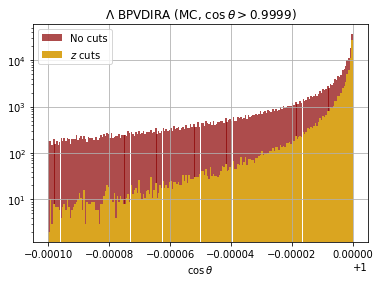

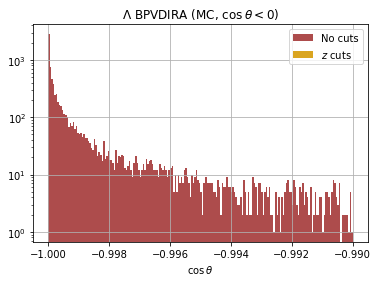

In [63]:
plt.hist(df_MC['L_BPVDIRA'], bins=200,
         color='darkred', alpha=0.7,range=(0.9999,1), label='No cuts')
plt.hist(df_MC_Filtered['L_BPVDIRA'], bins=200,
         color='goldenrod', alpha=1,range=(0.9999,1), label='$z$ cuts')
plt.grid()
plt.title(r"$\Lambda$ BPVDIRA (MC, $\cos\theta > 0.9999$)")
plt.xlabel(r"$\cos \theta$")
plt.yscale('log')
plt.legend()
#plt.savefig("mcvd/lambda_pointing-angle/LDIRA_MC_pos.pdf")
plt.show()

plt.hist(df_MC['L_BPVDIRA'], bins=200, 
         color='darkred', alpha=0.7,range=(-1,-0.99), label='No cuts')
plt.hist(df_MC_Filtered['L_BPVDIRA'], bins=200,
         color='goldenrod', alpha=1,range=(-1,-0.99), label='$z$ cuts')
plt.grid()
plt.title(r"$\Lambda$ BPVDIRA (MC, $\cos\theta < 0$)")
plt.xlabel(r"$\cos \theta$")
plt.yscale('log')
plt.legend()
#plt.savefig("mcvd/lambda_pointing-angle/LDIRA_MC_neg.pdf")
plt.show()

# $\Lambda_b$ pointing angle

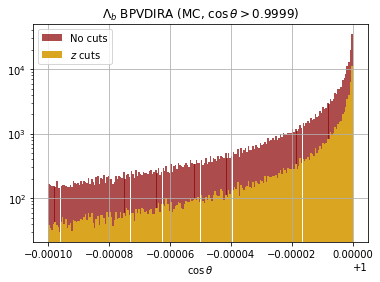

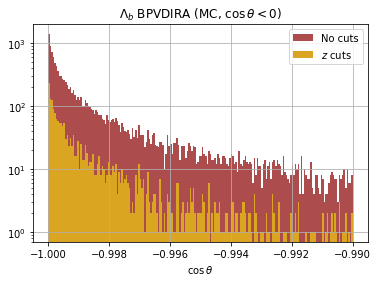

In [64]:
plt.hist(df_MC['Lb_BPVDIRA'], bins=200,
         color='darkred', alpha=0.7,range=(0.9999,1), label='No cuts')
plt.hist(df_MC_Filtered['Lb_BPVDIRA'], bins=200,
         color='goldenrod', alpha=1,range=(0.9999,1), label='$z$ cuts')
plt.grid()
plt.title(r"$\Lambda_b$ BPVDIRA (MC, $\cos\theta > 0.9999$)")
plt.xlabel(r"$\cos \theta$")
plt.yscale('log')
plt.legend()
#plt.savefig("mcvd/lambdab_pointing-angle/LbDIRA_MC_pos.pdf")
plt.show()

plt.hist(df_MC['Lb_BPVDIRA'], bins=200, 
         color='darkred', alpha=0.7,range=(-1,-0.99), label='No cuts')
plt.hist(df_MC_Filtered['Lb_BPVDIRA'], bins=200,
         color='goldenrod', alpha=1,range=(-1,-0.99), label='$z$ cuts')
plt.grid()
plt.title(r"$\Lambda_b$ BPVDIRA (MC, $\cos\theta < 0$)")
plt.xlabel(r"$\cos \theta$")
plt.yscale('log')
plt.legend()
#plt.savefig("mcvd/lambdab_pointing-angle/LbDIRA_MC_neg.pdf")
plt.show()

# $\Lambda$ and $\Lambda_b$ BPVIPCHI2

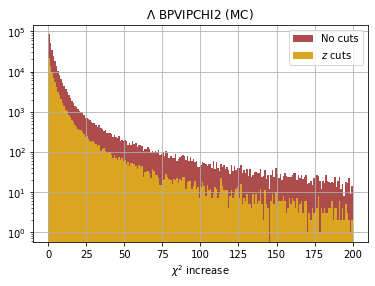

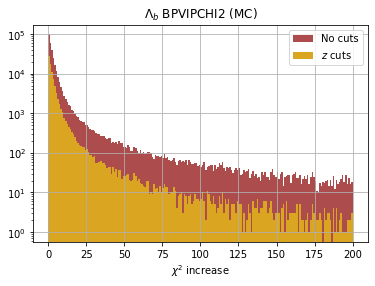

In [65]:
plt.hist(df_MC['L_BPVIPCHI2'], bins=200,
         color='darkred',alpha=0.7,range=(0,200), label='No cuts')
plt.hist(df_MC_Filtered['L_BPVIPCHI2'], bins=200,
         color='goldenrod',alpha=1,range=(0,200), label='$z$ cuts')
plt.grid()
plt.title(r"$\Lambda$ BPVIPCHI2 (MC)")
plt.xlabel(r"$\chi^2$ increase")
plt.yscale('log')
plt.legend()
#plt.savefig("mcvd/lambda-lambdab_BPVIPCHI2/L_BPVIP_MC.pdf")
plt.show()

plt.hist(df_MC['Lb_BPVIPCHI2'], bins=200,
         color='darkred',alpha=0.7,range=(0,200), label='No cuts')
plt.hist(df_MC_Filtered['Lb_BPVIPCHI2'], bins=200,
         color='goldenrod',alpha=1,range=(0,200), label='$z$ cuts')
plt.grid()
plt.title(r"$\Lambda_b$ BPVIPCHI2 (MC)")
plt.xlabel(r"$\chi^2$ increase")
plt.yscale('log')
plt.legend()
#plt.savefig("mcvd/lambda-lambdab_BPVIPCHI2/Lb_BPVIP_MC.pdf")
plt.show()

# $\Lambda$ and $\Lambda_b$ BPVVDCHI2

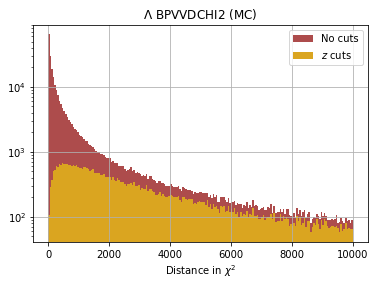

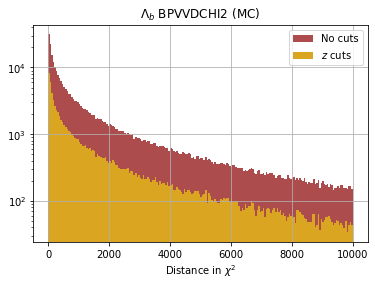

In [66]:
plt.hist(df_MC['L_BPVVDCHI2'], bins=200, range=(0,1e4),
         color='darkred',alpha=0.7, label='No cuts')
plt.hist(df_MC_Filtered['L_BPVVDCHI2'], bins=200, range=(0,1e4),
         color='goldenrod',alpha=1, label='$z$ cuts')
plt.grid()
plt.title(r"$\Lambda$ BPVVDCHI2 (MC)")
plt.xlabel(r"Distance in $\chi^2$")
plt.yscale('log')
plt.legend()
#plt.savefig("mcvd/lambda-lambdab_BPVVDCHI2/L_BPVVD_MC.pdf")
plt.show()

plt.hist(df_MC['Lb_BPVVDCHI2'], bins=200, range=(0,1e4),
         color='darkred',alpha=0.7, label='No cuts')
plt.hist(df_MC_Filtered['Lb_BPVVDCHI2'], bins=200, range=(0,1e4),
         color='goldenrod',alpha=1, label='$z$ cuts')
plt.grid()
plt.title(r"$\Lambda_b$ BPVVDCHI2 (MC)")
plt.xlabel(r"Distance in $\chi^2$")
plt.yscale('log')
plt.legend()
#plt.savefig("mcvd/lambda-lambdab_BPVVDCHI2/Lb_BPVVD_MC.pdf")
plt.show()